In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis (EDA): 
Let's perform an EDA to understand the distribution, relationships, and outliers in The data.

### Now we will read the first dataset. 
Actually, there are three files inside it. We will read them and save them in variables:

In [3]:
df_2022 = pd.read_csv("data/property_prices_july_2022.csv")
df_2023 = pd.read_csv("data/property_prices_july_2023.csv")
df_2024 = pd.read_csv("data/property_prices_july_2024.csv")

Let's have a look in everyone:

In [4]:
df_2022

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
284,Хаджи Димитър,205000.00,1102.15,EUR,Многостаен апартамемент,2022-07-28
285,Хиподрума,377277.50,1326.89,EUR,Многостаен апартамемент,2022-07-28
286,Хладилника,460016.66,2115.02,EUR,Многостаен апартамемент,2022-07-28
287,Център,529647.62,2792.63,EUR,Многостаен апартамемент,2022-07-28


In [5]:
df_2023

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,7-ми 11-ти километър,112150.66,1654.68,EUR,Двустаен апартамент,2023-07-28
1,Банишора,118202.97,1754.77,EUR,Двустаен апартамент,2023-07-28
2,Банкя (гр.),108600.00,1428.95,EUR,Двустаен апартамент,2023-07-28
3,Белите Брези,162233.00,2015.32,EUR,Двустаен апартамент,2023-07-28
4,Бенковски,94900.00,1395.59,EUR,Двустаен апартамент,2023-07-28
...,...,...,...,...,...,...
326,Хаджи Димитър,239000.00,2489.58,EUR,Многостаен апартамемент,2023-07-28
327,Хиподрума,445521.66,1265.69,EUR,Многостаен апартамемент,2023-07-28
328,Хладилника,490580.00,2063.43,EUR,Многостаен апартамемент,2023-07-28
329,Център,528999.94,2577.88,EUR,Многостаен апартамемент,2023-07-28


In [6]:
df_2024

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,134653.98,1987.51,EUR,Двустаен апартамент,2024-07-28
1,Банкя (гр.),131843.00,1890.84,EUR,Двустаен апартамент,2024-07-28
2,Белите Брези,249900.00,2108.86,EUR,Двустаен апартамент,2024-07-28
3,Бенковски,115863.50,1782.52,EUR,Двустаен апартамент,2024-07-28
4,Борово,135594.22,2148.50,EUR,Двустаен апартамент,2024-07-28
...,...,...,...,...,...,...
329,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
330,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
331,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
332,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


Now we will will combine them in one dataset named __combined_df__:

In [7]:
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

And check it:

In [8]:
combined_df

,Район,Цена,Цена / кв.м.,Валута,Тип Апартамент,Дата
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28
...,...,...,...,...,...,...
949,Суха Река,303037.00,1864.02,EUR,Многостаен апартамемент,2024-07-28
950,Хаджи Димитър,331999.50,2049.38,EUR,Многостаен апартамемент,2024-07-28
951,Хиподрума,446333.00,1410.21,EUR,Многостаен апартамемент,2024-07-28
952,Хладилника,817960.00,2493.78,EUR,Многостаен апартамемент,2024-07-28


Let's normalize the titles like convert the column names from Bulgarian to English:

In [9]:
combined_df = combined_df.rename(columns={
    'Район': 'region',
    'Цена': 'price',
    'Цена / кв.м.': 'price_per_sqm',
    'Валута': 'currency',
    'Тип Апартамент': 'apartment_type',
    'Дата': 'date'
})


combined_df.head()

,region,price,price_per_sqm,currency,apartment_type,date
0,Банишора,110201.52,1710.14,EUR,Двустаен апартамент,2022-07-28
1,Белите Брези,148125.00,1949.01,EUR,Двустаен апартамент,2022-07-28
2,Борово,141912.50,2120.07,EUR,Двустаен апартамент,2022-07-28
3,Бояна,167608.23,1888.09,EUR,Двустаен апартамент,2022-07-28
4,Бъкстон,109764.43,1869.47,EUR,Двустаен апартамент,2022-07-28


#### Let's take a closer look at the dataset.

In [10]:
combined_df.shape

(954, 6)

It has 954 observations and 6 features.

In [11]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,954.0,249583.736960,270069.988558,6500.0,114245.39,170162.100,281079.7725,3000000.00
price_per_sqm,954.0,1843.112956,626.005076,17.4,1479.21,1776.785,2140.8050,7741.38


In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          954 non-null    object 
 1   price           954 non-null    float64
 2   price_per_sqm   954 non-null    float64
 3   currency        954 non-null    object 
 4   apartment_type  954 non-null    object 
 5   date            954 non-null    object 
dtypes: float64(2), object(4)
memory usage: 44.8+ KB


In [13]:
combined_df.dtypes

region             object
price             float64
price_per_sqm     float64
currency           object
apartment_type     object
date               object
dtype: object

Let's convert the "date" column in the correct data type:

In [14]:
combined_df["date"] = pd.to_datetime(combined_df["date"])

Check the converted format:

In [15]:
combined_df["date"]

0     2022-07-28
1     2022-07-28
2     2022-07-28
3     2022-07-28
4     2022-07-28
         ...    
949   2024-07-28
950   2024-07-28
951   2024-07-28
952   2024-07-28
953   2024-07-28
Name: date, Length: 954, dtype: datetime64[ns]

Check for NaN values:

In [16]:
combined_df.isna().sum()

region            0
price             0
price_per_sqm     0
currency          0
apartment_type    0
date              0
dtype: int64

We don't have null values in this dataset.

### Let's plot the prices over time for each apartment type:

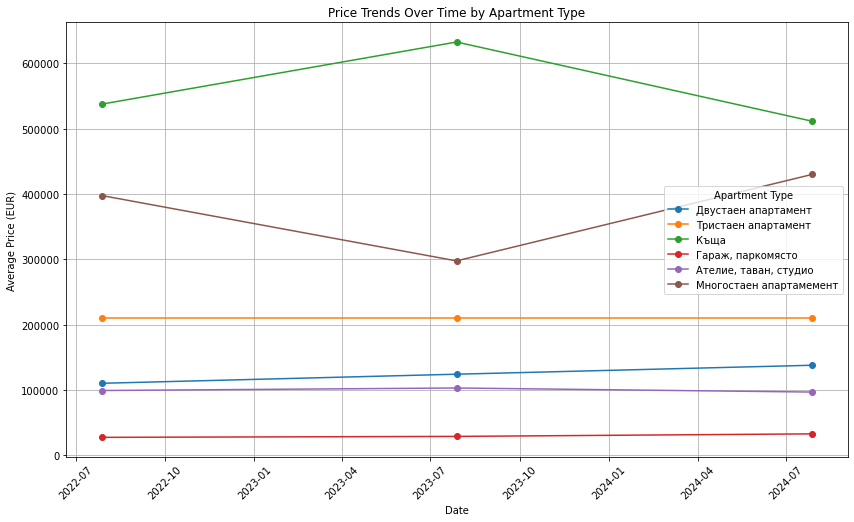

In [17]:
apartment_types = combined_df["apartment_type"].unique()

plt.figure(figsize=(14, 8))

for apartment_type in apartment_types:
    # Filter the DataFrame by apartment type
    filtered_df = combined_df[combined_df["apartment_type"] == apartment_type]
    
    # Group by date and calculate the mean price for each date
    price_over_time = filtered_df.groupby('date')['price'].median()
    
    # Plot the line for this apartment type
    plt.plot(price_over_time.index, price_over_time.values, marker='o', label=apartment_type)

plt.title('Price Trends Over Time by Apartment Type')
plt.xlabel('Date')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=45)
plt.legend(title='Apartment Type')
plt.grid(True)
plt.show()

#### Identify Outliers

In [18]:
Q1 = combined_df['price_per_sqm'].quantile(0.25)
Q3 = combined_df['price_per_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['price_per_sqm'] < lower_bound) | (combined_df['price_per_sqm'] > upper_bound)]
outliers

,region,price,price_per_sqm,currency,apartment_type,date
111,Изток,315092.78,3185.05,EUR,Тристаен апартамент,2022-07-28
117,Лагера,269378.22,17.40,EUR,Тристаен апартамент,2022-07-28
121,Лозенец,449972.12,3210.08,EUR,Тристаен апартамент,2022-07-28
184,Иван Вазов,566666.69,3455.28,EUR,Къща,2022-07-28
276,Оборище,1065244.38,3360.39,EUR,Многостаен апартамемент,2022-07-28
301,Горна Баня,140752.83,191.66,EUR,Двустаен апартамент,2023-07-28
407,Изток,315092.78,3185.05,EUR,Тристаен апартамент,2023-07-28
413,Лагера,269378.22,17.40,EUR,Тристаен апартамент,2023-07-28
417,Лозенец,449972.12,3210.08,EUR,Тристаен апартамент,2023-07-28
482,Изток,2245000.00,7741.38,EUR,Къща,2023-07-28


#### Removing the outliers

In [19]:
combined_df = combined_df[(combined_df['price_per_sqm'] >= lower_bound) & (combined_df['price_per_sqm'] <= upper_bound)].copy()

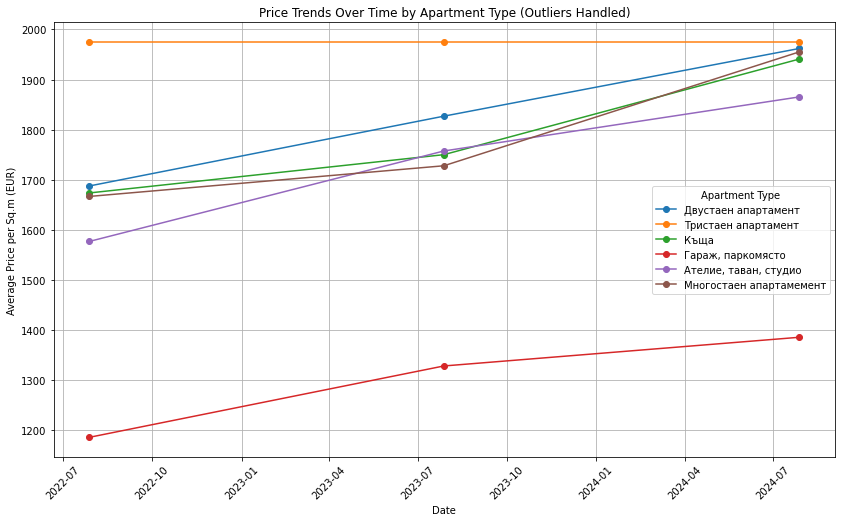

In [20]:
plt.figure(figsize=(14, 8))

for apartment_type in combined_df['apartment_type'].unique():
    filtered_df = combined_df[combined_df['apartment_type'] == apartment_type]
    price_over_time = filtered_df.groupby('date')['price_per_sqm'].mean()
    plt.plot(price_over_time.index, price_over_time.values, marker='o', label=apartment_type)

plt.title('Price Trends Over Time by Apartment Type (Outliers Handled)')
plt.xlabel('Date')
plt.ylabel('Average Price per Sq.m (EUR)')
plt.xticks(rotation=45)
plt.legend(title='Apartment Type')
plt.grid(True)
plt.show()

Let's see how many unique Ragions we have:

In [21]:
len(combined_df['region'].unique())

100

And which they are:

In [22]:
combined_df['region'].unique()

array(['Банишора', 'Белите Брези', 'Борово', 'Бояна', 'Бъкстон', 'Витоша',
       'Гевгелийски', 'Гео Милев', 'Горна Баня', 'Гоце Делчев',
       'Дианабад', 'Драгалевци', 'Дружба 1', 'Дружба 2', 'Дървеница',
       'Западен Парк', 'Захарна Фабрика', 'Зона Б18', 'Зона Б19',
       'Зона Б5', 'Иван Вазов', 'Изгрев', 'Изток', 'Илинден', 'Княжево',
       'Красна Поляна', 'Красно Село', 'Кръстова Вада', 'Лагера',
       'Левски', 'Левски В', 'Левски Г', 'Лозенец', 'Люлин 1', 'Люлин 10',
       'Люлин 2', 'Люлин 3', 'Люлин 4', 'Люлин 5', 'Люлин 6', 'Люлин 7',
       'Люлин 8', 'Люлин 9', 'Люлин Център', 'м-т Гърдова глава',
       'Малинова Долина', 'Манастирски ливади Запад',
       'Манастирски ливади Изток', 'Младост 1', 'Младост 1а', 'Младост 2',
       'Младост 3', 'Младост 4', 'Мотописта', 'Мусагеница', 'Надежда 1',
       'Надежда 2', 'Надежда 3', 'Надежда 4', 'Обеля', 'Обеля 1',
       'Обеля 2', 'Оборище', 'Овча Купел', 'Овча Купел 1', 'Овча Купел 2',
       'Павлово', 'Подуене', 

# Let's prepear the model and train it:

Extract date features:

In [23]:
combined_df['year'] = combined_df['date'].dt.year
combined_df['month'] = combined_df['date'].dt.month

Drop the original 'Дата' column and unnecessary columns:

In [24]:
combined_df = combined_df.drop(columns=['date', 'currency', 'price'])

In [25]:
combined_df

,region,price_per_sqm,apartment_type,year,month
0,Банишора,1710.14,Двустаен апартамент,2022,7
1,Белите Брези,1949.01,Двустаен апартамент,2022,7
2,Борово,2120.07,Двустаен апартамент,2022,7
3,Бояна,1888.09,Двустаен апартамент,2022,7
4,Бъкстон,1869.47,Двустаен апартамент,2022,7
...,...,...,...,...,...
948,Студентски Град,2077.81,Многостаен апартамемент,2024,7
949,Суха Река,1864.02,Многостаен апартамемент,2024,7
950,Хаджи Димитър,2049.38,Многостаен апартамемент,2024,7
951,Хиподрума,1410.21,Многостаен апартамемент,2024,7


Encode categorical variables:

In [26]:
label_encoder_region = LabelEncoder()
label_encoder_apartment_type = LabelEncoder()

combined_df['region'] = label_encoder_region.fit_transform(combined_df['region'])
combined_df['apartment_type'] = label_encoder_apartment_type.fit_transform(combined_df['apartment_type'])

Define features and target:

In [27]:
X = combined_df.drop(columns=['price_per_sqm'], axis=1) 
y = combined_df['price_per_sqm']  # Target variable

In [28]:
X

,region,apartment_type,year,month
0,1,2,2022,7
1,3,2,2022,7
2,5,2,2022,7
3,6,2,2022,7
4,7,2,2022,7
...,...,...,...,...
948,85,4,2024,7
949,86,4,2024,7
950,92,4,2024,7
951,93,4,2024,7


Split the data into training and testing sets:

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

,region,apartment_type,year,month
911,14,4,2024,7
466,87,5,2023,7
823,52,3,2024,7
25,31,2,2022,7
84,94,2,2022,7
...,...,...,...,...
106,22,5,2022,7
274,53,4,2022,7
890,44,0,2024,7
444,65,5,2023,7


In [31]:
y_train

911    2656.16
466    1681.18
823    2798.66
25     1373.21
84     1791.09
        ...   
106    2161.82
274    1678.15
890    1232.25
444    1631.15
102    1839.47
Name: price_per_sqm, Length: 736, dtype: float64

In [32]:
X_train.shape, y_test.shape

((736, 4), (184,))

In [33]:
X_test.shape, y_train.shape

((184, 4), (736,))

## Train the model

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

## Prediction results

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([1674.54450176, 1930.81541462, 1482.21952841, 1660.22603635,
       1607.61554863, 1614.53885193, 1795.7643029 , 1776.31234236,
       1859.34956908, 1590.0781402 , 1692.80325685, 1608.44808075,
       1877.01172145, 1737.53316521, 1882.61707537, 1625.87430372,
       1675.73770721, 1699.60181623, 1595.44756472, 2045.11191245,
       1671.56148813, 1656.04981728, 1406.105605  , 1853.50828576,
       2031.9866525 , 2030.79344705, 1892.5233923 , 1694.2323917 ,
       1562.5096709 , 1971.38439995, 1767.48804542, 1860.07091574,
       1610.36263286, 1870.21316207, 1974.36741357, 2057.04396696,
       1612.74904376, 1604.03593227, 1879.75880568, 1838.82914702,
       2027.81043342, 1710.93726801, 1769.15310966, 1440.70856307,
       1897.06028471, 2058.23717241, 1758.4142606 , 1585.30531839,
       1861.86072392, 1965.41837269, 2055.85076151, 1964.22516724,
       1762.71522361, 1601.64952137, 1953.48631819, 2059.43037786,
       1792.42061594, 1479.00058539, 1615.73205739, 1484.00933

## Make predictions

In [38]:
# Example: Predicting for 2025 with specific assumptions for features
future_data = {
    'region': label_encoder_region.transform(['Банишора', 'Белите Брези']),  # Encode regions
    'apartment_type': label_encoder_apartment_type.transform(['Двустаен апартамент', 'Тристаен апартамент']),  # Encode apartment types
    'year': [2025] * 2,  # Assuming 2 predictions for example purposes
    'month': [1, 1],  # Predicting for January 2025
}

# Convert to DataFrame
future_X = pd.DataFrame(future_data)

# Make predictions
future_predictions = model.predict(future_X)

In [40]:
# Decode the encoded labels back to their original strings
decoded_regions = label_encoder_region.inverse_transform(future_data['region'])
decoded_apartment_types = label_encoder_apartment_type.inverse_transform(future_data['apartment_type'])

# Display predictions with original labels
for i, prediction in enumerate(future_predictions):
    region_label = decoded_regions[i]
    apartment_type_label = decoded_apartment_types[i]
    print(f"Prediction for {region_label} - {apartment_type_label}: {prediction:.2f} per square meter")

Prediction for Банишора - Двустаен апартамент: 1820.81 per square meter
Prediction for Белите Брези - Тристаен апартамент: 2099.75 per square meter


## Evaluate the model

In [41]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
cdf

,Coef
region,0.596603
apartment_type,92.582870
year,83.869759
month,0.000000


In [42]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [43]:
print("Coefficients:", *model.coef_)
print("Intercept:", model.intercept_)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print(f"Mean squared error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred):.2f}")

Coefficients: 0.5966027253334064 92.58287032461074 83.86975883962967 0.0
Intercept: -168201.21767229616
Mean Absolute Error:  356.41990049341575
Mean squared error (MSE): 207019.45
Root Mean Squared Error: 454.99
Coefficient of determination (R^2): 0.06


## Residuals

In [44]:
residuals = y_test - y_pred

In [45]:
residuals

325     529.215498
383      86.494585
552     318.980472
302     533.173964
545   -1071.905549
          ...     
388     271.041572
97      434.555112
939    -424.957891
476     -36.525893
756    -614.255502
Name: price_per_sqm, Length: 184, dtype: float64